# Exercises 1 
---

## 1. A coin game
Each of *n* players has *a* fair coins. In a round each player tosses one coin. If all or no
coins show heads, all coins are put aside. If exactly one coin shows head, only that player gets
his coin back and additionally a coin from the coins aside (if this set is empty, that player gets
no additional coin). If >= 2 and < n coins show heads, only that players get their coins back.
The game ends if at least one player has no coins. We call it a draw when all players end with
zero coins.

### a) We consider the parameters (n = 2; a = 2). Answer the following questions analytically:
**(i) Determine all possible paths of the game and the final results with its probabilities.**


We have 2 players, with 2 coins each. 
1. At the initial round we have 2 tosses (one from each player). The outcomes of tossing 2 coins in a round are : HH, HT, TH, TT where H is head and T is tail. As the coins are fair, the probability of getting either a tail or head on each coin is 1/2. As we are tossing 2 independent coins at the same time, the probabilities of the 4 outcomes mentioned before are 1/4.
Depending on the result of the toss:
- All or no heads (HH, TT): all coins put aside (side=2)
- One head (HT, TH): the player gets coin back + another from aside if there is any

2. Second round
Game can end in a draw if both rounds have been HH or TT. (side=4)
Game ends if there has been a draw in a round and a player has won the other. (side=1)
Game moves to a third round if each player wins one round. (side=0)

3. Third round





**(ii) What is the average number of rounds for this new coin game?**


**(iii) In a draw there are no winners. What is the expected number of coins of the winner?**

### (b) Write a MATLAB/Python function that simulates the generalized coin game above. Check it via your results to the questions in (a). Give the Monte Carlo approximations for the following questions for the both parameter pairs (n = 3; a = 5) and (n = 9; a = 12) with 10^6 Monte Carlo runs:

**(i) What is the average number of rounds?**

**(ii) What is the probability of a draw (i.e. all players end with zero coins)?**

**(iii) How many coins has the winner (or winners) of the coin game on average? In a draw (all players lost their coins) there are no winners.**

In [1]:
#%pip install numpy

In [21]:
import numpy as np
def coin(n, a):
    coins = np.full(n, a)
    aside = 0
    rounds = 0
    while np.all(coins > 0):
        rounds += 1
        heads = np.random.rand(n) < 0.5
        num_heads = np.sum(heads)

        if num_heads == 0 or num_heads == n:
            coins -= 1
            aside += n
            
        if num_heads == 1:
            winner = np.where(heads)[0][0]

            # others lose coin
            for i in range(n):
                if i != winner:
                    coins[i] -= 1
                    aside += 1
            
            # winner keeps coin automatically
            
            # winner gets extra from aside if possible
            if aside > 0:
                coins[winner] += 1
                aside -= 1
        else:
            for i in range(n):
                if not heads[i]:
                    coins[i] -= 1
                    aside += 1

    draw = np.all(coins == 0)
    winner_coins = coins[coins > 0] if not draw else 0

    return rounds, draw, winner_coins

In [22]:
def coin_mc(n, a, M=10**6): #n: num players, a: num fair coins
    rounds_list = []
    draws = 0
    total_winner_coins = 0
    total_winner_count = 0    
    for i in range(M):
        rounds, draw, wcoins = coin(n, a)
        rounds_list.append(rounds)
        draws += draw
        if not draw:
            total_winner_coins += np.sum(wcoins)
            total_winner_count += len(wcoins)
    print("Average rounds:", np.mean(rounds_list))
    print("Draw probability:", draws/M)
    print("Average winner coins:", total_winner_coins / total_winner_count)


In [24]:
coin_mc(2, 2)

Average rounds: 2.000683
Draw probability: 0.357303
Average winner coins: 2.249918098411547


In [25]:
coin_mc(3, 5)

Average rounds: 5.747072
Draw probability: 0.013921
Average winner coins: 2.591577382454024


In [26]:
coin_mc(9, 12)

Average rounds: 17.497066
Draw probability: 0.0
Average winner coins: 3.722060490358786


## 2. Chess duel


**•How many rounds has the match on average?**

**•What is the probability of a tie-break?**

**•What is the probability of player B winning the match?**


**(a) Give an approximation for the questions above for the parameters *p1 = 0.36, d1 = 0.4, p2 = 0.29, d2 = 0.5, N = 14* via 10^6 Monte Carlo runs**

In [7]:
def chessduel(p1, d1, p2, d2, N):
    scoreA = 0
    scoreB = 0
    rounds = 0
    while rounds < N:
        rounds += 1
        r = np.random.rand()
        if r < p1: # A wins
            scoreA += d1
        elif r < p1 + d1: # draw
            scoreA += 0.5
            scoreB += 0.5
        else: #B wins
            scoreB += 1

        if scoreA > scoreB + (N-rounds):
            break
        if scoreB > scoreA + (N-rounds):
            break
    tiebreak = False
    if scoreA == scoreB:
        tiebreak = True
        while scoreA == scoreB:
            r = np.random.rand()
            if r < p2: # A wins rapid
                scoreA += 1
                break
            elif r >= p2 + d2: # B wins rapid
                scoreB += 1
            #if draw continue
    B_wins = scoreB > scoreA
    return rounds, tiebreak, B_wins

In [8]:
def chessduel_mc(p1, d1, p2, d2, N, M=10**6):
    rounds_list = []
    tiebreaks = 0
    B_wins = 0
    for i in range(M):
        rounds, tiebreak, B_win = chessduel(p1, d1, p2, d2, N)
        rounds_list.append(rounds)
        tiebreaks += tiebreak
        B_wins += B_win
    print("Average rounds:", np.mean(rounds_list))
    print("Tiebreak probability:", tiebreaks/M)
    print("B wins probability:", B_wins/M)

In [9]:
chessduel_mc(0.36, 0.4, 0.29, 0.5, 14)

Average rounds: 12.863498
Tiebreak probability: 0.032639
B wins probability: 0.732378


In [10]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


**(b) Give for the parameters d1 = 0.26, d2 = 0.29, p2 = 0.98 ·p1; N = 14 an approximation of the function plot (0, 1/2) →[0, 1], p1 7→P(Player B wins for probability p1) via Monte Carlo simulations with 105 MC runs for all p1 ∈{0.01, 0.02, . . . , 0.5}**

In [11]:
import matplotlib.pyplot as plt
def chessduel_mc_plot():
    d1 = 0.26
    d2 = 0.29
    N = 14
    M = 10**6
    p1_values = np.arange(0.01, 0.51, 0.01)
    B_win_probs = []
    for p1 in p1_values:
        p2 = 0.98 * p1
        B_wins = 0
        for _ in range(M):
            _, _, Bwins = chessduel(p1, d1, p2, d2, N)
            B_wins += Bwins
        B_win_probs.append(B_wins/M)
        print(f"p1={p1:.2f} done")
    plt.figure()
    plt.plot(p1_values, B_win_probs)
    plt.xlabel("p1")
    plt.ylabel("P(B wins)")
    plt.title("B wins probability vs p1")
    plt.grid()
    plt.show()
            

p1=0.01 done
p1=0.02 done
p1=0.03 done
p1=0.04 done
p1=0.05 done
p1=0.06 done
p1=0.07 done
p1=0.08 done
p1=0.09 done
p1=0.10 done
p1=0.11 done
p1=0.12 done
p1=0.13 done
p1=0.14 done
p1=0.15 done
p1=0.16 done
p1=0.17 done
p1=0.18 done
p1=0.19 done
p1=0.20 done
p1=0.21 done
p1=0.22 done
p1=0.23 done
p1=0.24 done
p1=0.25 done
p1=0.26 done
p1=0.27 done
p1=0.28 done
p1=0.29 done
p1=0.30 done
p1=0.31 done
p1=0.32 done
p1=0.33 done
p1=0.34 done
p1=0.35 done
p1=0.36 done
p1=0.37 done
p1=0.38 done
p1=0.39 done
p1=0.40 done
p1=0.41 done
p1=0.42 done
p1=0.43 done
p1=0.44 done
p1=0.45 done
p1=0.46 done
p1=0.47 done
p1=0.48 done
p1=0.49 done
p1=0.50 done


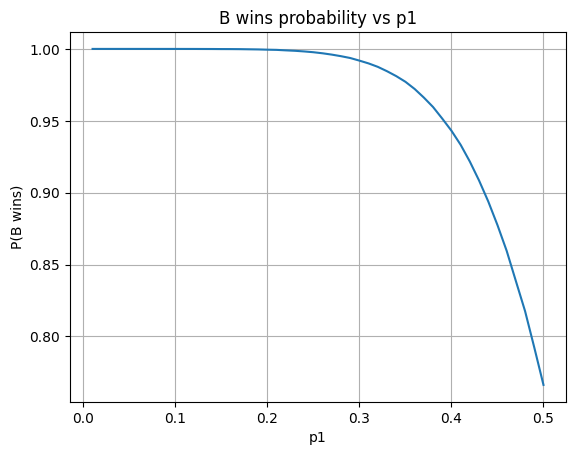

In [12]:
chessduel_mc_plot()